<a href="https://colab.research.google.com/github/anshu247/Machine-Learning/blob/master/Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GLOBAL TERRORISM



In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0rc1-py2.py3-none-any.whl size=258106 sha256=52a8e5521705cc79021ffa123d471523211c8353272f57300e6623cb89eac24c
  Stored in directory: /tmp/pip-ephem-wheel-cache-q0vzamgt/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


### *About Dataset:*

> This dataset contains terrorism record from 1971-2013 with 1,20,078 rows and 135 columns.But we have shortlisted 17 relevant attributes from the dataset



1.   *Year*: It ranges from 1971-2013 and tells the year in which the attack is done
2.   *Month*:It is numerical month ranges from  1-12 i.e. january is 1 and december is 12 
3.   *Day*:It is numerical day of a month ranges from  1-31
4. *Country*:It tells the country in which terror attack is been done
5.  *Region*:It tells about the region where the terror attack happened and is divided into :
        * South Asia
        * Middle East & North Africa
        * South America
        * Western Europe
        * Central America and Caribbean
6. *City*: Name of the city where the incident occurs
7. *latitude and longitude*: This is to provide a geo-location
8. *Attacked Type*:Method of attacking
9. *Killed*:Number of people killed
10. *Wounded*:Number of people wounded in the attack
11. *Target*:The specific person, building, installation that was targeted
12. *Group*: Terrorist group involved
13. *Target_type*: 
      *   Private Citizens & Property	
      * Business
      * Government (General)	
      * Police
      * Military
14. *Weapon_type*:
      * Explosives
      * Firearms
      * Unknown 
      * Incendiary
      * Melee
15. *Motive*:What was the motive of the terror attack

#### Import library

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv('drive/My Drive/globalterrorism.csv',encoding='latin1',engine="python")

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type','Motive']]

In [ ]:
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)


In [ ]:
#Please check  profile-report for EDA
profile.to_file('EDA.html')

## **PLEASE SEE THE EDA.HTML FOR COMPLETE EDA REPORT**

In [ ]:
data.columns


Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Group',
       'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181690 entries, 0 to 181689
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181690 non-null  int64  
 1   Month        181690 non-null  int64  
 2   Day          181690 non-null  int64  
 3   Country      181690 non-null  object 
 4   Region       181690 non-null  object 
 5   city         181256 non-null  object 
 6   latitude     177134 non-null  float64
 7   longitude    177133 non-null  float64
 8   AttackType   181690 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181054 non-null  object 
 12  Group        181690 non-null  object 
 13  Target_type  181690 non-null  object 
 14  Weapon_type  181690 non-null  object 
 15  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


In [ ]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10312
Wounded         16310
Target            636
Group               0
Target_type         0
Weapon_type         0
Motive         131129
dtype: int64

From Profiling report we can see that 6.3% duplicate rows 

In [ ]:
data.drop_duplicates(inplace = True) 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171040 entries, 0 to 181689
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         171040 non-null  int64  
 1   Month        171040 non-null  int64  
 2   Day          171040 non-null  int64  
 3   Country      171040 non-null  object 
 4   Region       171040 non-null  object 
 5   city         170609 non-null  object 
 6   latitude     167034 non-null  float64
 7   longitude    167033 non-null  float64
 8   AttackType   171040 non-null  object 
 9   Killed       161665 non-null  float64
 10  Wounded      155872 non-null  float64
 11  Target       170496 non-null  object 
 12  Group        171040 non-null  object 
 13  Target_type  171040 non-null  object 
 14  Weapon_type  171040 non-null  object 
 15  Motive       49494 non-null   object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


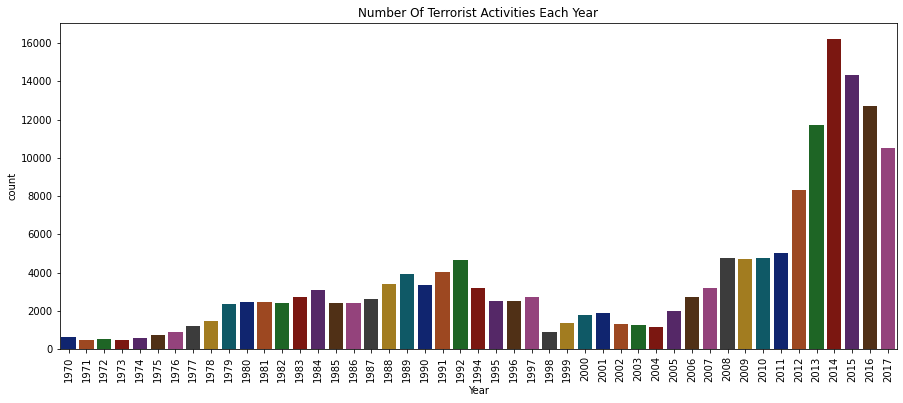

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette="dark")
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

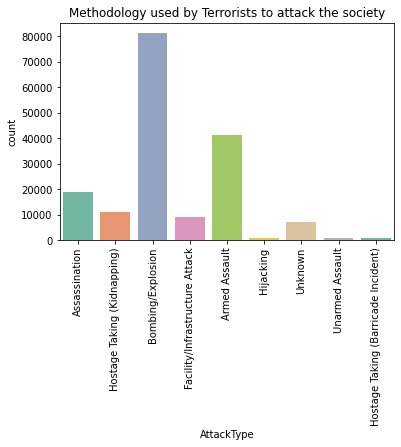

In [ ]:

sns.countplot('AttackType',data=data,palette='Set2')
plt.xticks(rotation=90)
plt.title('Methodology used by Terrorists to attack the society')
plt.show()

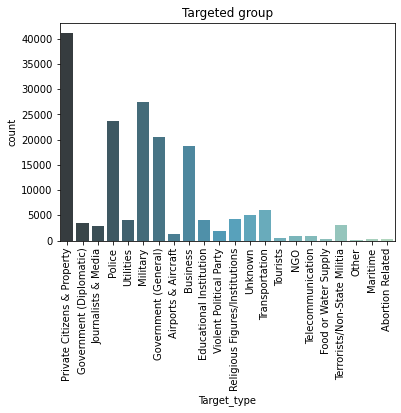

In [ ]:

sns.countplot(data['Target_type'],palette="GnBu_d")
plt.xticks(rotation=90)
plt.title('Targeted group')
plt.show()

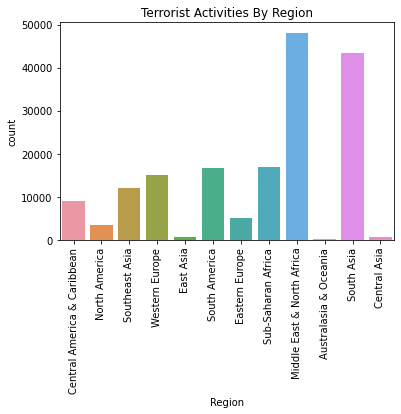

In [ ]:

sns.countplot('Region',data=data)
plt.xticks(rotation=90)
plt.title('Terrorist Activities By Region')
plt.show()

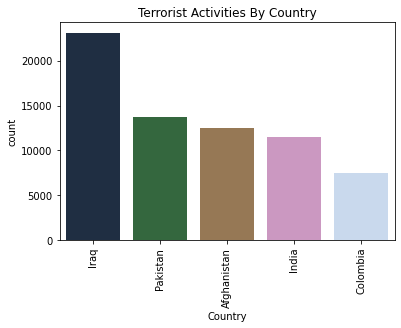

In [ ]:

sns.countplot('Country',data=data,order=data.Country.value_counts().iloc[:5].index,palette="cubehelix")
plt.xticks(rotation=90)
plt.title('Terrorist Activities By Country')
plt.show()

In [ ]:
print('Maximum people killed in an attack are:',data['Killed'].max(),'that took place in',data.loc[data['Killed'].idxmax()].Country,"in year",data.loc[data['Killed'].idxmax()].Year)

Maximum people killed in an attack are: 1570.0 that took place in Iraq in year 2014


In [ ]:
pip install squarify 

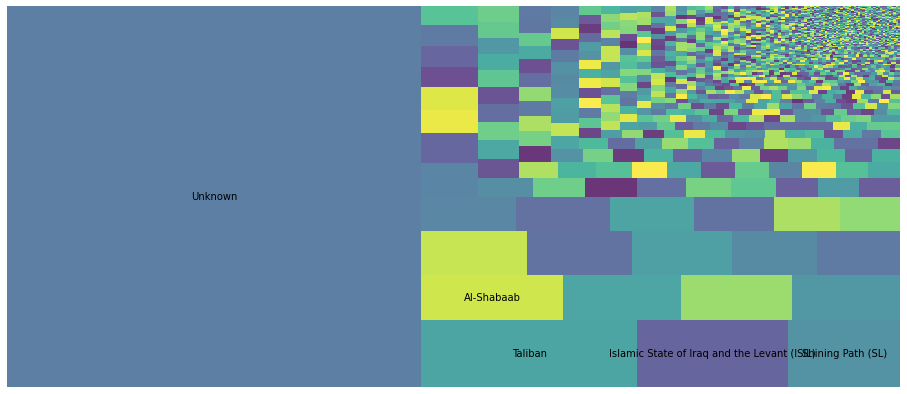

In [ ]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
fig = plt.gcf()
fig.set_size_inches(16, 7)

fig = plt.gcf()
fig.set_size_inches(16,7)
# If you have 2 lists
squarify.plot(sizes=data.Group.value_counts(), label=data.Group.value_counts().iloc[:5].index, alpha=.8)
plt.axis('off')
plt.show()
 



In [ ]:
data['casualities']=data['Killed']+data['Wounded']

In [ ]:
# we are only working with 45593 values
data.dropna(inplace=True)


In [ ]:
from IPython.display import IFrame
IFrame('https://public.tableau.com/views/gobalterrorism/Sheet1?:language=en&:display_count=y&:origin=viz_share_link:showVizHome=no&:embed=true', width=1000, height=925)

In [ ]:
from IPython.display import IFrame
IFrame('https://public.tableau.com/shared/7NFN4KYYY?:display_count=y&:origin=viz_share_link:showVizHome=no&:embed=true', width=1000, height=925)


In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Group',
       'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')

In [ ]:
data=data[data['Year']==2014]

In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Country']=label_encoder.fit_transform(data['Country']) 
  
data['Target_type']=label_encoder.fit_transform(data['Target_type']) 
data['Group']=label_encoder.fit_transform(data['Group']) 

data['Target']=label_encoder.fit_transform(data['Target']) 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 125334 to 142225
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1772 non-null   int64  
 1   Month        1772 non-null   int64  
 2   Day          1772 non-null   int64  
 3   Country      1772 non-null   int64  
 4   Region       1772 non-null   object 
 5   city         1772 non-null   object 
 6   latitude     1772 non-null   float64
 7   longitude    1772 non-null   float64
 8   AttackType   1772 non-null   object 
 9   Killed       1772 non-null   float64
 10  Wounded      1772 non-null   float64
 11  Target       1772 non-null   int64  
 12  Group        1772 non-null   int64  
 13  Target_type  1772 non-null   int64  
 14  Weapon_type  1772 non-null   object 
 15  Motive       1772 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory usage: 235.3+ KB


In [ ]:



X=['Country', 'casualities','Group','Target_type','Target']
data=data[X]
data

,Country,casualities,Group,Target_type,Target
125334,14,0.0,126,18,261
125336,45,34.0,81,11,791
125341,25,16.0,123,10,648
125346,25,0.0,75,10,405
125347,25,1.0,75,10,648
...,...,...,...,...,...
142160,46,0.0,136,1,103
142192,70,120.0,12,11,724
142216,25,0.0,75,11,160
142217,25,0.0,75,16,91


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2fd8e0a20>,
                 k=None, metric=None, model=None, timings=True)

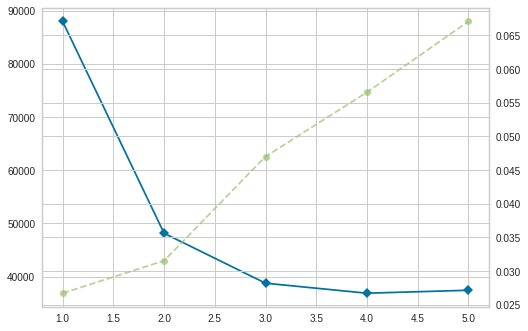

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans()

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans,k=(1,6))
visualizer.fit(data)      


In [ ]:
from sklearn.metrics import silhouette_score
cluster_range = list (range(2,10))
for nof_clusters in cluster_range:
    cluster_number = KMeans(n_clusters=nof_clusters)
    prediction = cluster_number.fit_predict(data)
    center = cluster_number.cluster_centers_

    s_score = silhouette_score(data, prediction)
    print("For cluster number = {}, the silhouette score is {})".format(nof_clusters, s_score))

For cluster number = 2, the silhouette score is 0.597248933875952)
For cluster number = 3, the silhouette score is 0.5280010642023979)
For cluster number = 4, the silhouette score is 0.47275257998810566)
For cluster number = 5, the silhouette score is 0.4193437863584397)
For cluster number = 6, the silhouette score is 0.3696287713510918)
For cluster number = 7, the silhouette score is 0.3769900402254548)
For cluster number = 8, the silhouette score is 0.37821978528346173)
For cluster number = 9, the silhouette score is 0.38998841472974083)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10, init='k-means++',n_jobs=1)
kmeans
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[ 34.16751788,   6.51889683, 117.19509704,   8.35137896,
        742.37487232],
       [ 36.71500631,   7.15510719, 110.78058008,   8.2925599 ,
        234.98865069]])

As we have 4 dimension so to visluize we will use only 3 attributes
i.e.Country,Group,killed

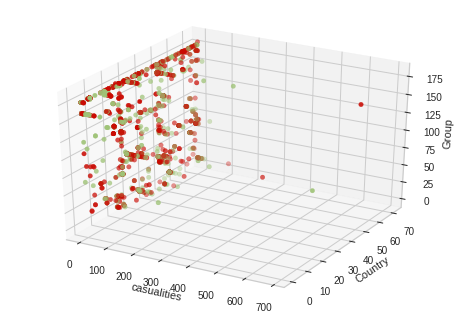

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = np.array(['r', 'g'])

ax.scatter(data['casualities'],data['Country'],data['Group'],c=colormap[kmeans.labels_], marker='o')

ax.set_xlabel('casualities')
ax.set_ylabel('Country')
ax.set_zlabel('Group')

plt.show()

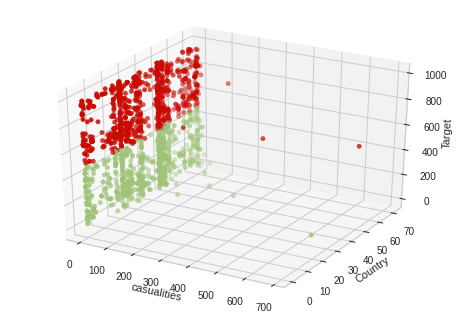

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = np.array(['r', 'g'])

ax.scatter(data['casualities'],data['Country'],data['Target'],c=colormap[kmeans.labels_], marker='o')

ax.set_xlabel('casualities')
ax.set_ylabel('Country')
ax.set_zlabel('Target')

plt.show()

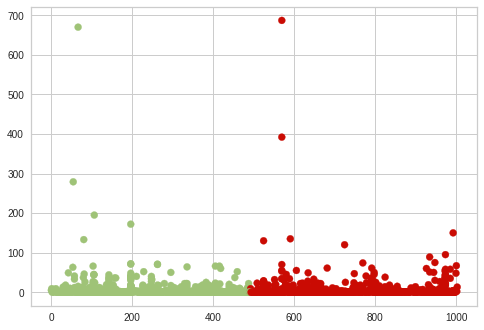

In [ ]:
plt.scatter(x=data['Target'],y=data['casualities'],c=colormap[kmeans.labels_])

In [ ]:
from sklearn.cluster import AgglomerativeClustering

complete = AgglomerativeClustering( affinity='euclidean', linkage='complete')
complete.fit_predict(data)
avg = AgglomerativeClustering( affinity='euclidean', linkage='average')
avg.fit_predict(data)
single = AgglomerativeClustering( affinity='euclidean', linkage='single')
single.fit_predict(data)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import davies_bouldin_score 

# we store the cluster labels 
labels = complete.labels_ 
print("DB index for complete linkage: ",davies_bouldin_score(data, labels)) 

labels = avg.labels_ 
print("DB index for Average linkage: ",davies_bouldin_score(data, labels)) 

labels = single.labels_ 
print("DB index for single linkage: ",davies_bouldin_score(data, labels)) 


DB index for complete linkage:  0.5458014349943482
DB index for Average linkage:  0.9092855345040005
DB index for single linkage:  0.32925233760613354


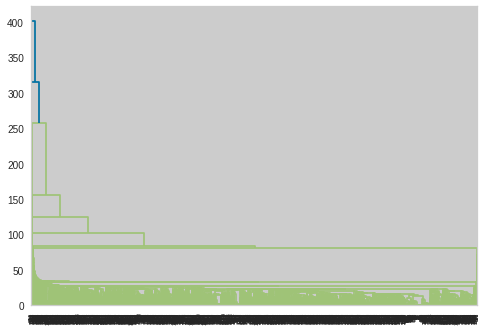

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(data, "single")
fig = plt.figure()
dn = dendrogram(Z)
plt.show()

In [ ]:
print("Number of Clusters fromed in Hierachal Clustering in complete linkage are: ",single.n_clusters)

Number of Clusters fromed in Hierachal Clustering in complete linkage are:  2
